<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>
<center><h1>Midterm</h1></center>

You will be doing an intensive analysis of consumer behavioral, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.



# Data

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.
# Tasks
## Task 1. Classification (50 points)

Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set. 

More specifically,

1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
1. Report and interpret the most meaningful classifications metrics
1. Show and explain the hyper-parameter fitting process.

Point breakdown:

- (10 points) Basic exploratory data analysis (EDA) 
    - Appropriate univariate descriptive statistics and figures
    - Appropriate bi-variate descriptive statistics and figures
- ( 5 points) Advanced EDA
    - Free-response, shows us what they know! 
- ( 5 points) Train/test split
- (10 points) Feature selection
- (15 points) Model fitting
- ( 5 points) Performance points 



PLAN IS:
- -1- Load the data / EDA with y-data
- -2- Engineer the data to be able to run model on them
- -3- Logistic regression
- -4- XGBoost / TPOT

## Load the data - Visualization in "online_shoppers_intention.html" file

In [1]:
import pandas as pd
place = '/Users/Gilles/Documents/Github/midterm/dat/online_shoppers_intention.csv.gz'
df1 = pd.read_csv(place)

In [2]:
df1.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [3]:
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
profile = ProfileReport(
            df1, 
            title=" Shopper Intention Data",html={"style": {"full_width": True}},
            sort = None
            )

In [5]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
report = '/Users/Gilles/Documents/Github/midterm/dat/online_shoppers_intention.html'
profile.to_file(report)

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

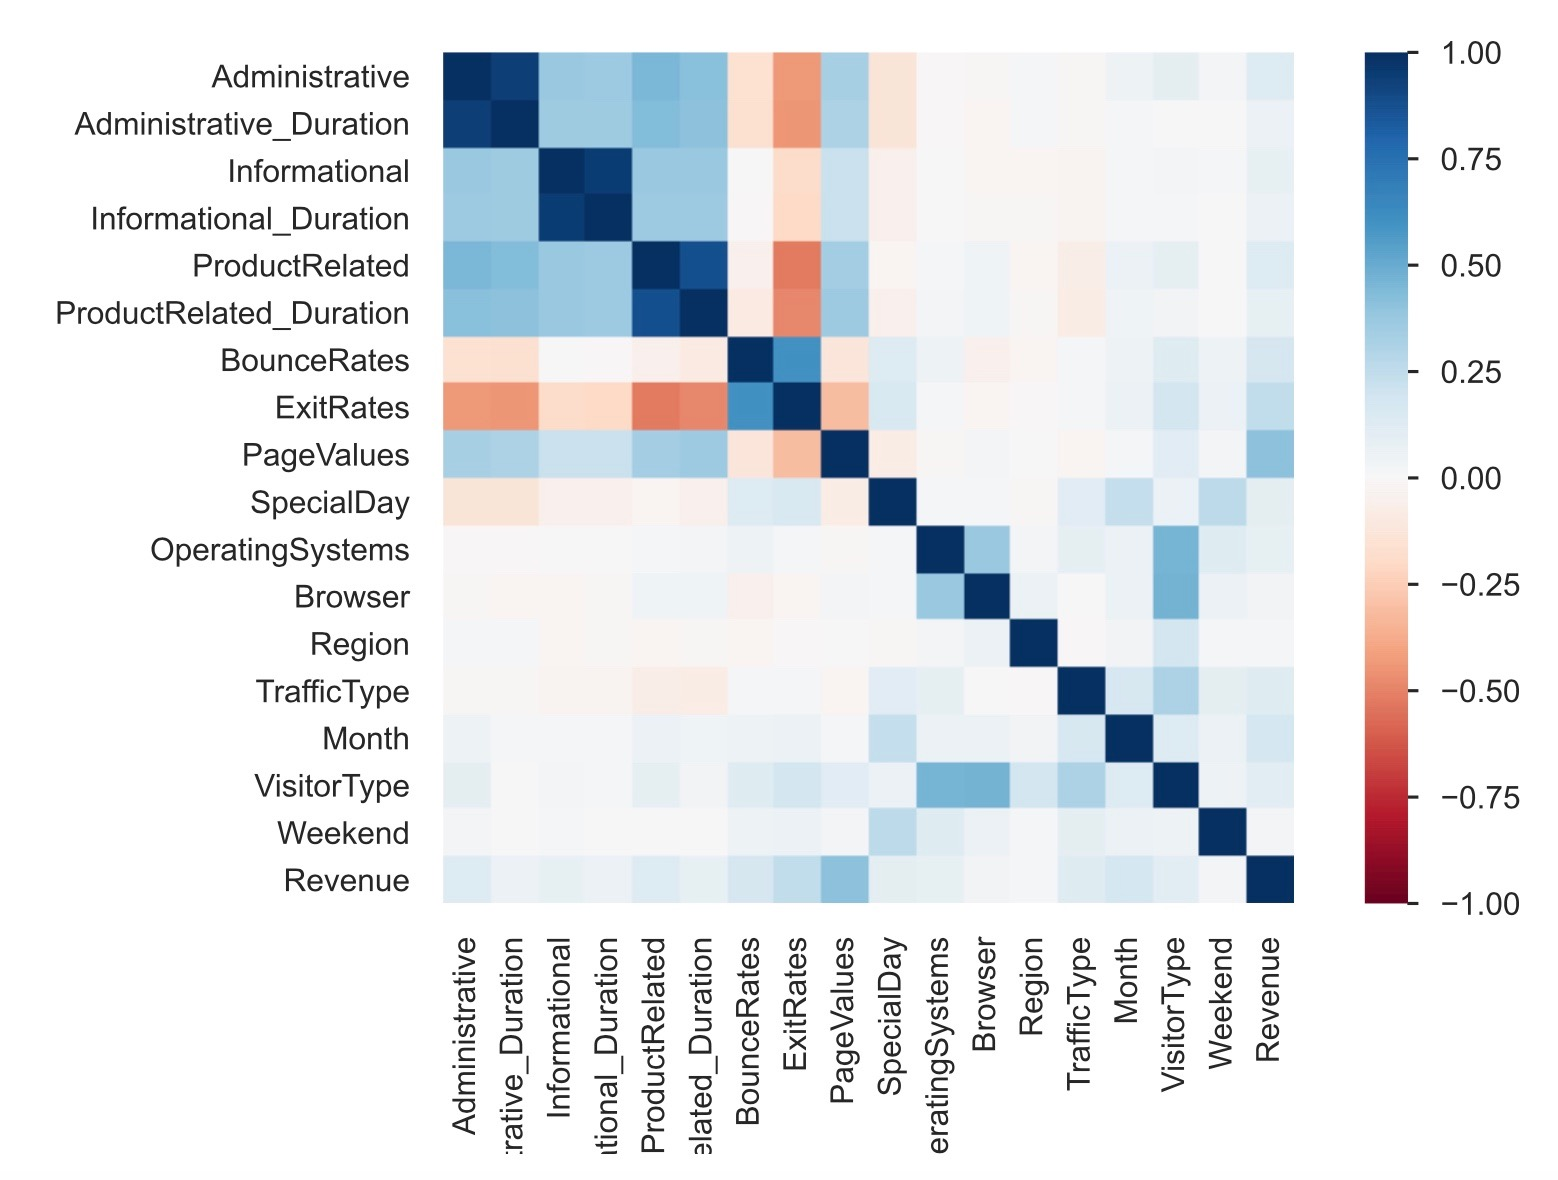

In [7]:
from IPython.display import Image, display
# change the filename to wherever you downloaded/uploaded the file
filename = '/Users/Gilles/Documents/Github/midterm/dat/correlations.jpeg'
display(Image(filename=filename))

In [9]:
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

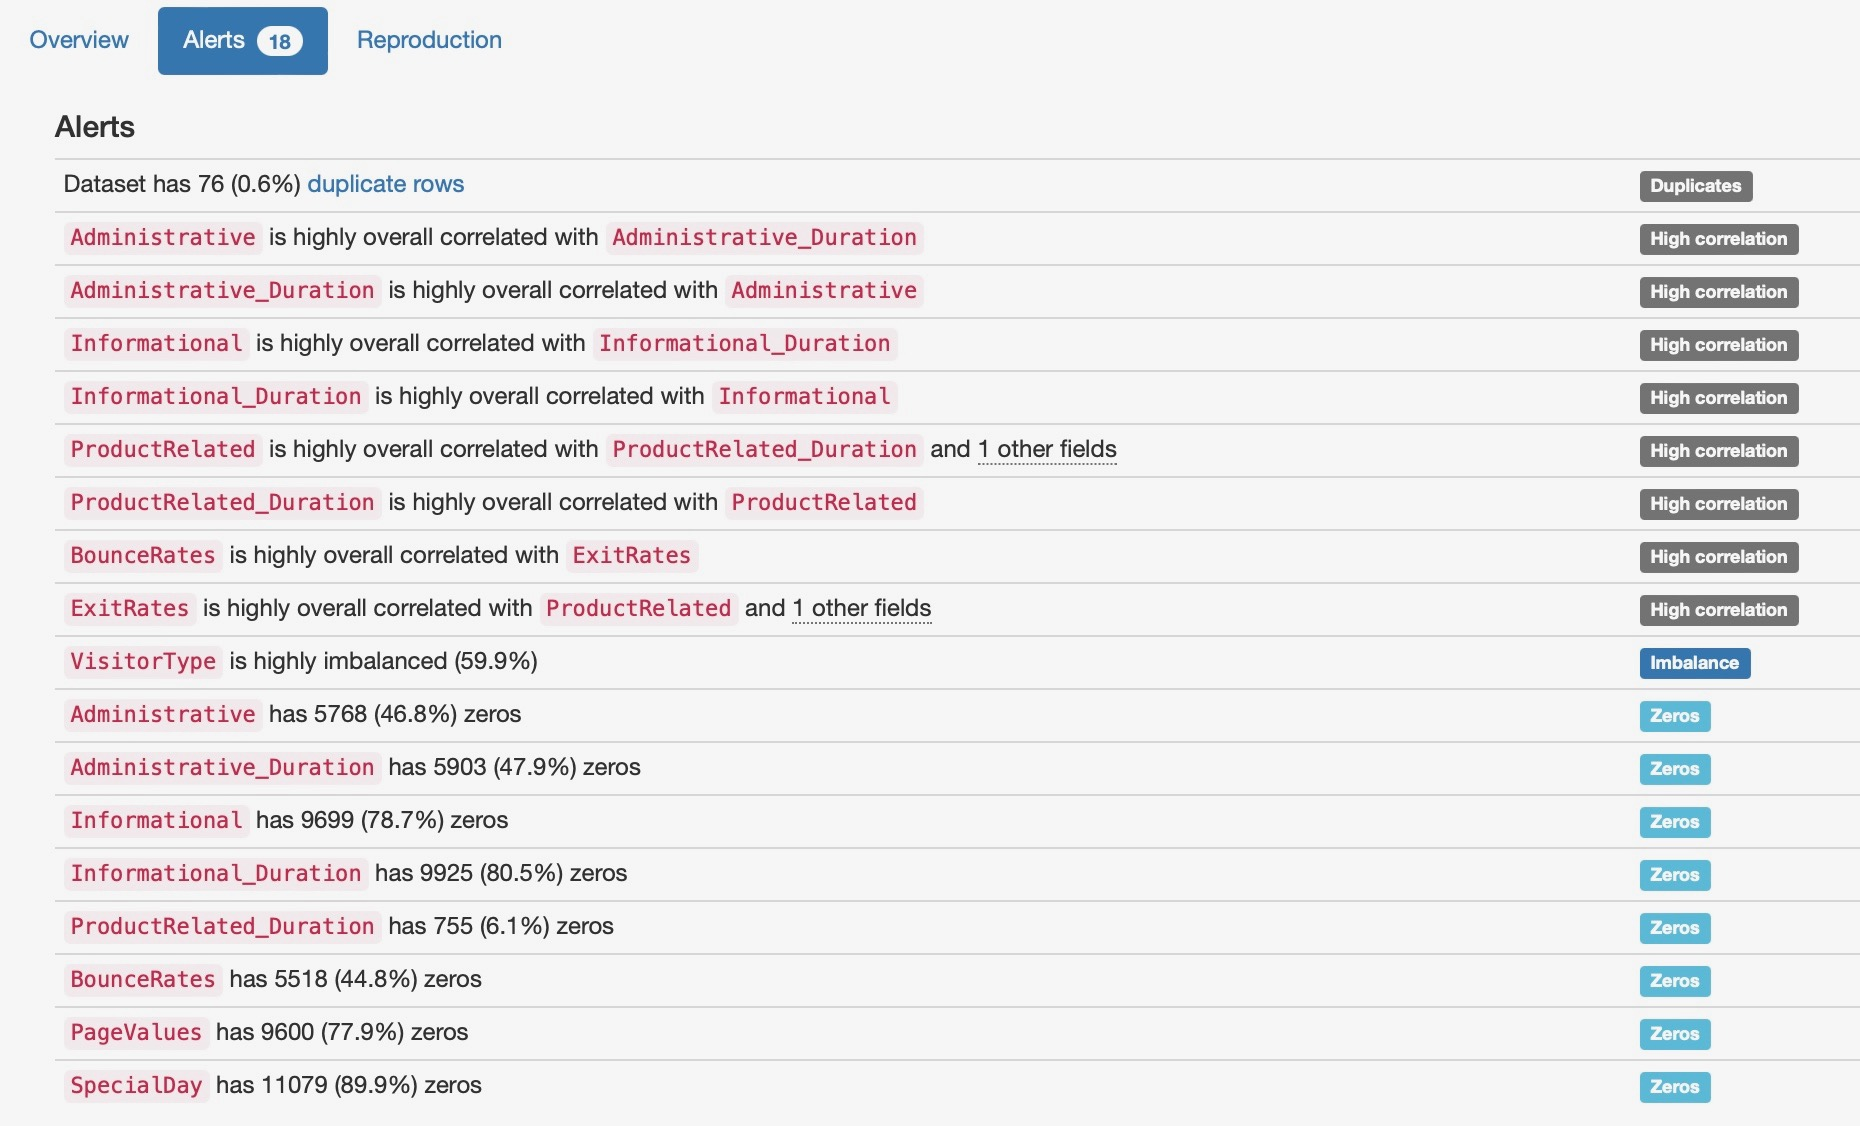

In [10]:
filename = '/Users/Gilles/Documents/Github/midterm/dat/overview.jpeg'
display(Image(filename=filename))

### Data Review: From the online_shoppers_intention.html we pick up the following

- Correlations
    - Administrative and Administrative Duration
    - Informational and Information Duration
    - Product Related and Product Related Duration
    - Bounced Rates and Exit Rates
    - Exit Rate to Administrative and Product Related data
- Label = revenue True/False
    - 10422 are False, 1908 are True none are blank
- Predictor Variables
    - All are numeric except Month and Visitor Types who will need to be converted to int
- General
    - There are 12,330 rows. 76 are duplicates




## Engineer the data

In [3]:
month_str2num = {
    s: i+1 for i, s in enumerate(['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 
                                  'Aug','Sep','Oct','Nov','Dec'])
}
df1['Month'] = df1['Month'].replace(month_str2num)

In [4]:
visitor_str2num = {
    s: i for i, s in enumerate(['Other','New_Visitor','Returning_Visitor'])
}
df1['VisitorType'] = df1['VisitorType'].replace(visitor_str2num)

In [5]:
df1['Weekend?']=df1['Weekend'].replace({True:1, False:0})
df1['Revenue?']=df1['Revenue'].replace({True:1, False:0})

In [6]:
# remove the duplicates 
df1 = df1.drop_duplicates()

In [7]:
# remove the correlated variables
df2 = df1.drop(['Administrative',
         'Informational',
         'ProductRelated',
         'BounceRates',
         'ExitRates',
         'Weekend',
         'Revenue'],axis=1)

In [8]:
df2.head(2)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend?,Revenue?
0,0.0,0.0,0.0,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,64.0,0.0,0.0,2,2,2,1,2,2,0,0


Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set

In [9]:
# add some kind of visual

In [10]:
masktrain = ((df2['Month'] > 5) | (df2['Month'] < 13))
train_dataset = df2[masktrain]

In [11]:
masktest = ((df2['Month'] == 2) | (df2['Month'] == 3))
test_dataset = df2[masktest]

In [12]:
print("train_size: ",train_dataset.shape,"  test_size: ",test_dataset.shape)

train_size:  (12205, 13)   test_size:  (2041, 13)


In [13]:
y_train = train_dataset['Revenue?'].values
y_test =  test_dataset['Revenue?'].values
X_train = train_dataset.drop(columns='Revenue?').values
X_test = test_dataset.drop(columns='Revenue?').values 

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)

In [16]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

In [17]:
print("accuracy:", accuracy(y_test, lr_predictions))
print("precision:", precision(y_test, lr_predictions))
print("recall:", recall(y_test, lr_predictions))
print("f1 score:", f1_score(y_test, lr_predictions))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_predictions))

accuracy: 0.6682998530132288
precision: 0.22298850574712645
recall: 0.9948717948717949
f1 score: 0.36431924882629113
confusion matrix:
[[1170  676]
 [   1  194]]


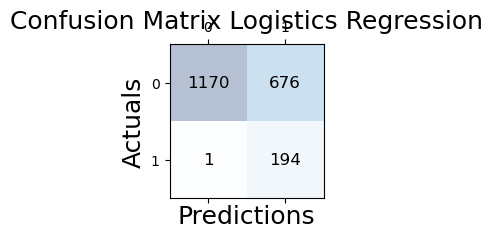

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

conf_matrix = confusion_matrix(y_test, lr_predictions)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Logistics Regression', fontsize=18)
plt.show()

## Gradient Boosting Model

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier(random_state=42) # YOUR CODE HERE
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_test)

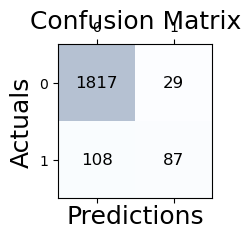

In [20]:
conf_matrix = confusion_matrix(y_test, gbt_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
print("accuracy:", accuracy(y_test, lr_predictions))
print("precision:", precision(y_test, lr_predictions))
print("recall:", recall(y_test, lr_predictions))
print("f1 score:", f1_score(y_test, lr_predictions))

accuracy: 0.6682998530132288
precision: 0.22298850574712645
recall: 0.9948717948717949
f1 score: 0.36431924882629113


## Interpretation

# Task 2. Customer Segmentation (25 points)
Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
Return plots and cluster images generated for the data.
Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).
Point breakdown:

(15 points) Clustering code
(10 points) Clustering analysis

PLAN IS:
- -1- Run a PCA - 3 parameters
- -2- Visualize the clusters in 2D and 3D
- -3- Predict avec the 3 parameters (instead of 12 variables)
- -4- KMeans - to figure out the grouping
- -5- Interpretations

## Principal Component Analysis

In [22]:
df2.head(2)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend?,Revenue?
0,0.0,0.0,0.0,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,64.0,0.0,0.0,2,2,2,1,2,2,0,0


In [23]:
dfy = df2['Revenue?']
dfX = df2.drop('Revenue?', axis=1)

In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(),PCA(n_components=3, whiten=True,random_state=42))
pca = pca_pipeline.named_steps['pca']
dfXreduced = pca_pipeline.fit_transform(dfX)

In [26]:
print("dfXreduced.shape: ",dfXreduced.shape,
      " Explained Variance Ratio:", pca.explained_variance_ratio_)


dfXreduced.shape:  (12205, 3)  Explained Variance Ratio: [0.14274097 0.12633405 0.10395768]


## Visualize

In [27]:
# display functions
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])
    
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

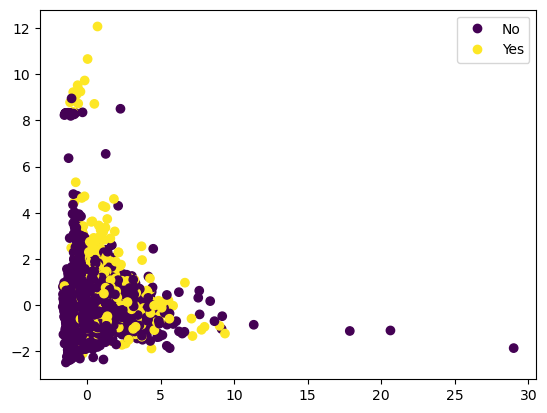

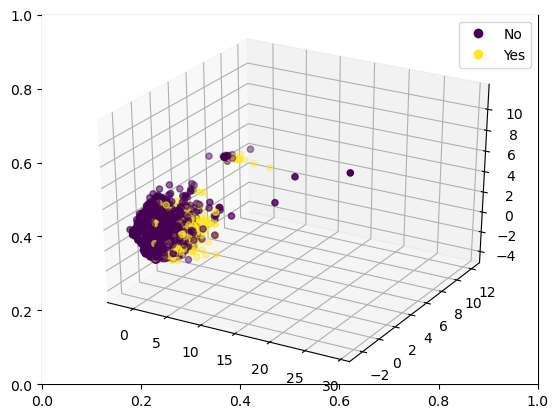

In [28]:
visualize_2pcs(dfXreduced, dfy)
visualize_3pcs(dfXreduced, dfy)

## Predict with the 3 consolidated variables

In [29]:
# week8 code 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


def train(X, y, standardize = True) -> None:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if standardize == True:
        pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                    ('logistic_regression', LogisticRegression(class_weight='balanced'))]).fit(X_train, y_train)
    else:
        pipeline = Pipeline(steps=[('logistic_regression', 
                                    LogisticRegression(class_weight='balanced'))]).fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred,target_names=['No','Yes - Purchased']))
    print("")
    print("accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred))
    print("f1 score:", f1_score(y_test, y_pred))
    print("roc auc score:", roc_auc_score(y_test, y_pred))
    print("confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

In [30]:
train(dfX, dfy)

                 precision    recall  f1-score   support

             No       0.94      0.90      0.92      2079
Yes - Purchased       0.55      0.69      0.61       362

       accuracy                           0.87      2441
      macro avg       0.75      0.79      0.77      2441
   weighted avg       0.88      0.87      0.88      2441


accuracy: 0.8705448586644817
precision: 0.5511111111111111
recall: 0.6850828729281768
f1 score: 0.6108374384236452
roc auc score: 0.7939603878830398
confusion matrix:
[[1877  202]
 [ 114  248]]


In [31]:
# it is giving better results with consolidated variables?

## Kmeans

In [32]:
# copy paste from week 8 new product launch

In [33]:
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(kmeans.inertia_) # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

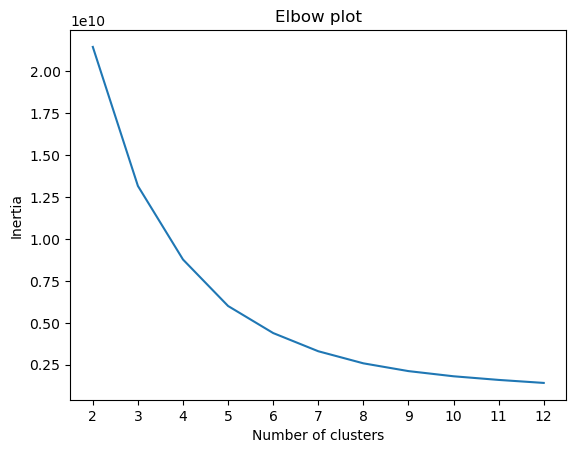

In [34]:
import warnings
warnings.filterwarnings("ignore") 
# otherwise FutureWarning: The default value of `n_init` will change from 10 to 'auto'
visualize_elbow(dfX, [2,3,4,5,6,7,8,9,10,11,12])

In [61]:
# 5 looks like a breaking point = elbow
KMeans(n_clusters=5, random_state=10)

KMeans(n_clusters=5, random_state=10)

In [62]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(dfX)

KMeans(n_clusters=5, random_state=10)

In [63]:
print("kmeans.labels_: ",kmeans.labels_)
resultats = kmeans.labels_.tolist() # transforming the ndarray to a list
resultats.count(1)

kmeans.labels_:  [0 0 0 ... 0 0 0]


188

In [64]:
for x in range(5):
    print("The size of Cluster",x," is of ",resultats.count(x)," observations")

The size of Cluster 0  is of  8222  observations
The size of Cluster 1  is of  188  observations
The size of Cluster 2  is of  2933  observations
The size of Cluster 3  is of  852  observations
The size of Cluster 4  is of  10  observations


In [65]:
X = dfX.values

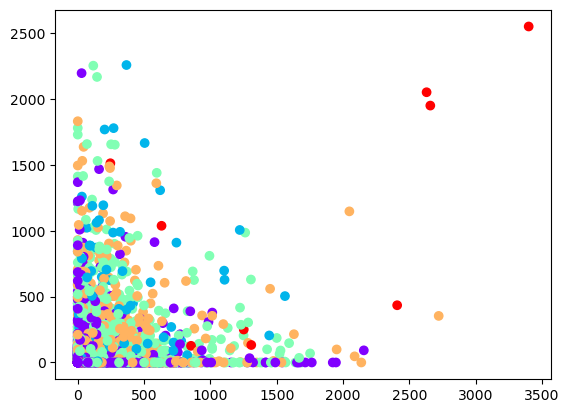

In [66]:
f = plt.figure()
plt.scatter(X[:,0], X[:,1], 
            c=kmeans.labels_, cmap='rainbow') # nicer choice of colors

plt.show() 
# group1 bleue clair / groupe 2; violet / 3 vert / 4 rouge ??? how can I see kernel

In [ ]:
# Does not look too good